In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/vanilla_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 134s 10ms/step


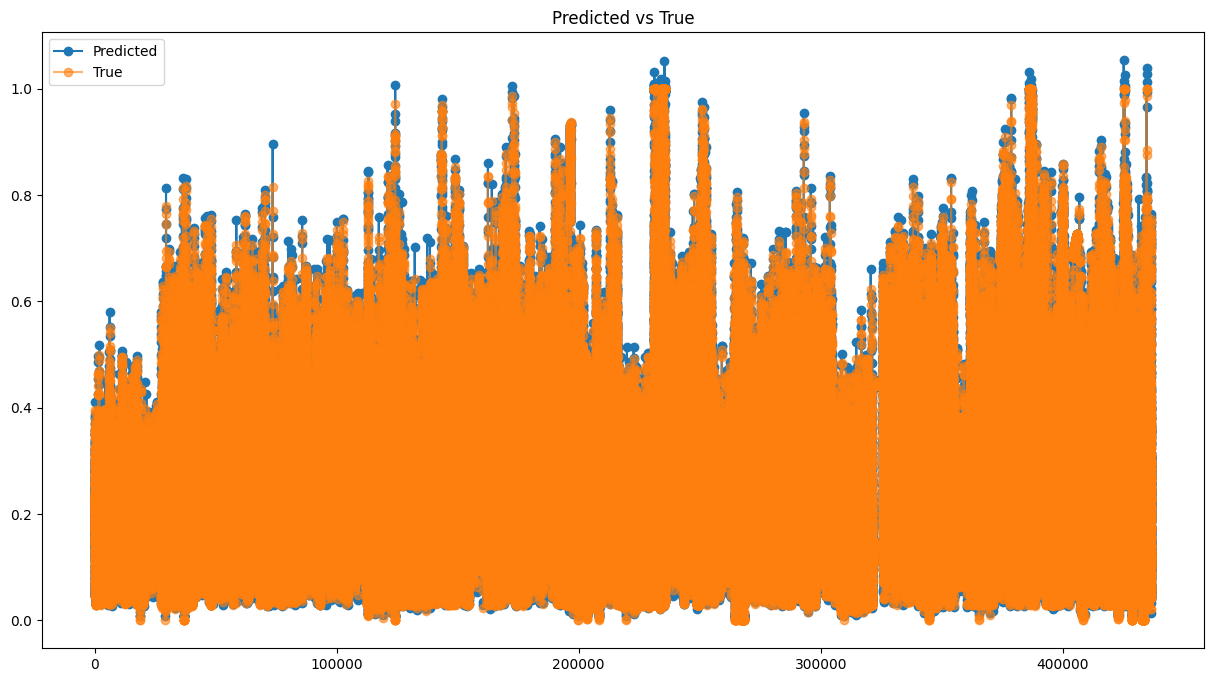

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.011109491316962011,
 'mse': 0.017022474403459734,
 'rmse': 0.0002897646348164418}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          142.564453
1          140.084839
2          140.452896
3          137.986404
4          151.769669
...               ...
436598     120.265228
436599     162.933517
436600     202.807800
436601     203.898666
436602     230.664703

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  142.564453
2023-01-01 00:15:00   140.0  140.084839
2023-01-01 00:30:00   139.0  140.452896
2023-01-01 00:45:00   145.0  137.986404
2023-01-01 01:00:00   159.0  151.769669
...                     ...         ...
2035-06-14 21:30:00   137.0  120.265228
2035-06-14 21:45:00   177.0  162.933517
2035-06-14 22:00:00   198.0  202.807800
2035-06-14 22:15:00   216.0  203.898666
2035-06-14 22:30:00   233.0  230.664703

[436603 rows x 2 columns]

AP, BE, EP: (0.9832249966788975, 0.014814407629832204, 0.0019605956912703104)


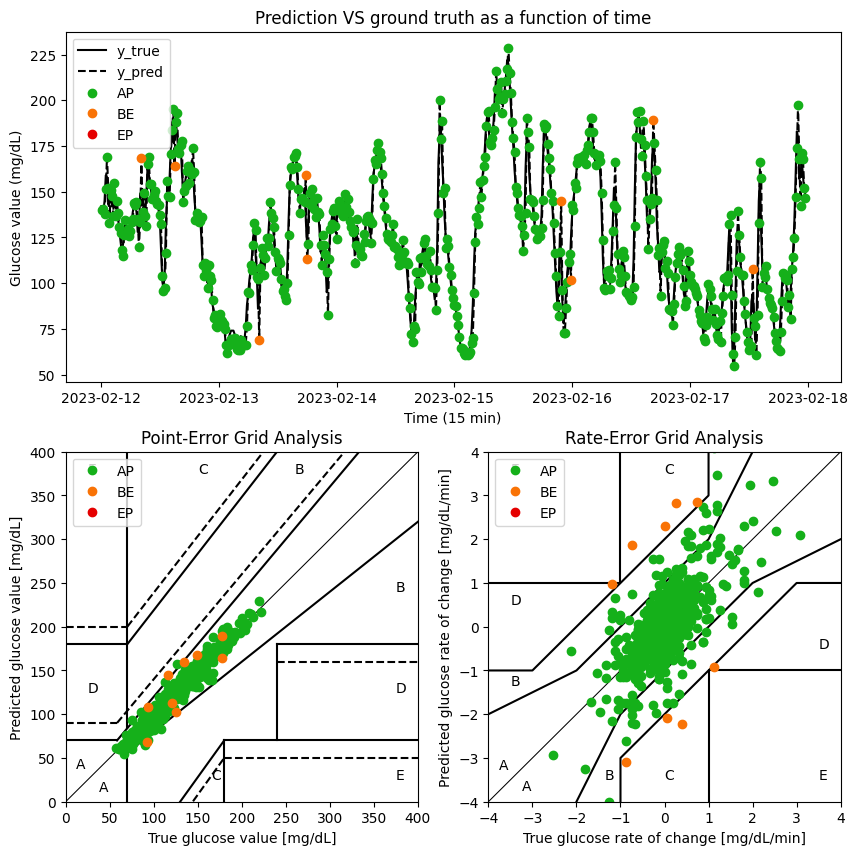

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  142.564453       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  140.084839 -0.066667 -0.165308     AP   
2      2023-02-12 00:30:00   139.0  140.452896 -0.066667  0.024537     AP   
3      2023-02-12 00:45:00   145.0  137.986404  0.400000 -0.164433     AP   
4      2023-02-12 01:00:00   159.0  151.769669  0.933333  0.918884     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  120.265228  2.333333  2.404792     AP   
436599 2035-07-26 21:45:00   177.0  162.933517  2.666667  2.844553     AP   
436600 2035-07-26 22:00:00   198.0  202.807800  1.400000  2.658286     AP   
436601 2035-07-26 22:15:00   216.0  203.898666  1.200000  0.072724     AP   
436602 2035-07-26 22:30:00   233.0  230.664703  1.133333  1.784402     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     A  
436601     A     B  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 73ms/step


Glucose level Predict  Glucose level True
0               0.222966            0.219565
1               0.217576            0.217391

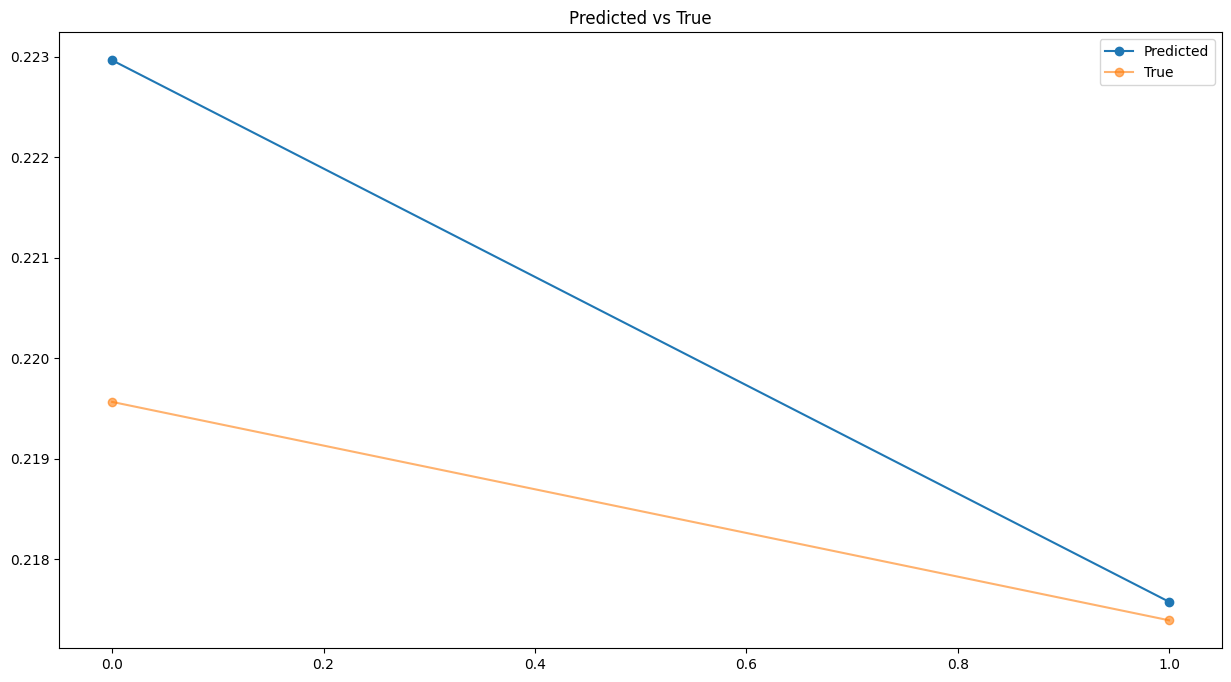

{'mae': 0.0017927155546519913,
 'mse': 0.002408417937399516,
 'rmse': 5.800476961187739e-06}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             142.564468               141.0
1             140.084824               140.0

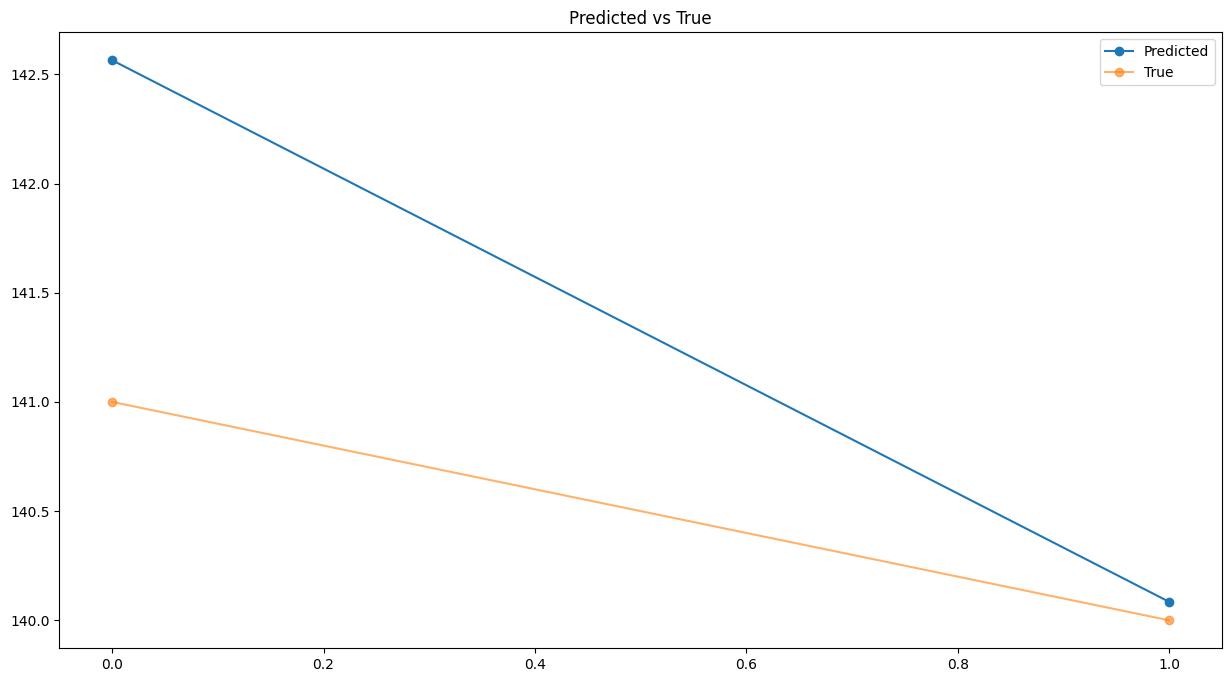

{'mae': 0.82464599609375,
 'mse': 1.1078710142469865,
 'rmse': 1.2273781842086464}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 83ms/step


Glucose level Predict  Glucose level True
0               0.222966            0.219565
1               0.224044            0.217391

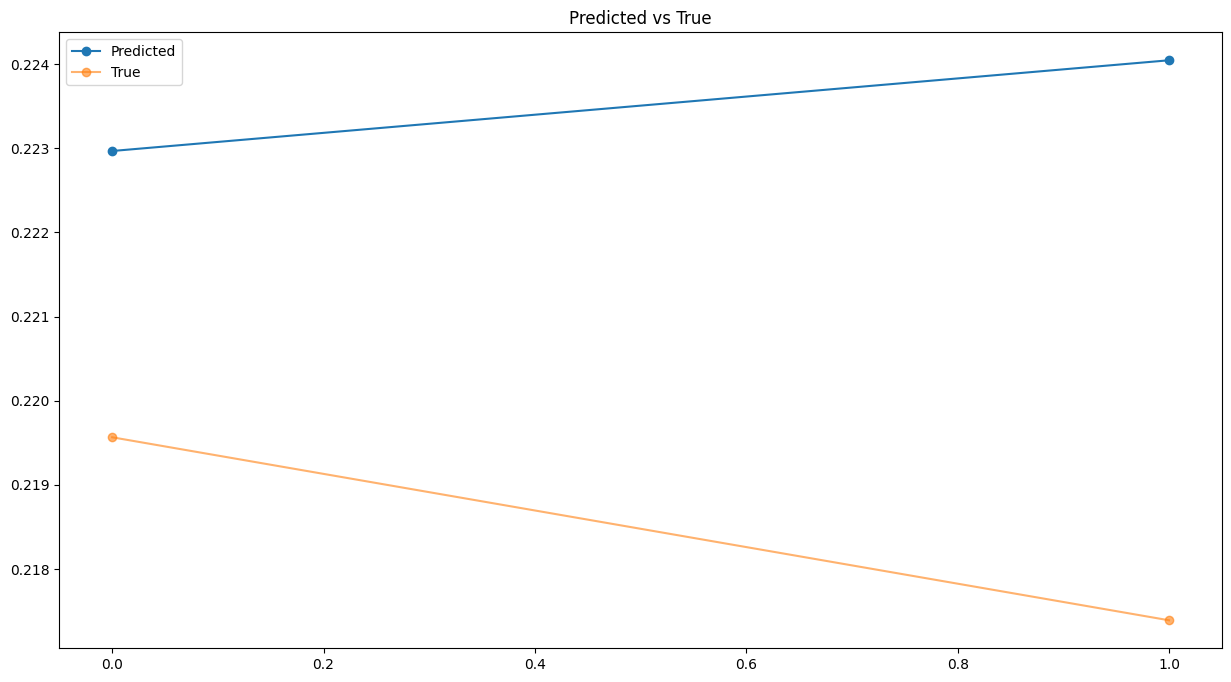

{'mae': 0.00502678162377812,
 'mse': 0.005283164146253009,
 'rmse': 2.791182339625328e-05}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             142.564438               141.0
1             143.060196               140.0

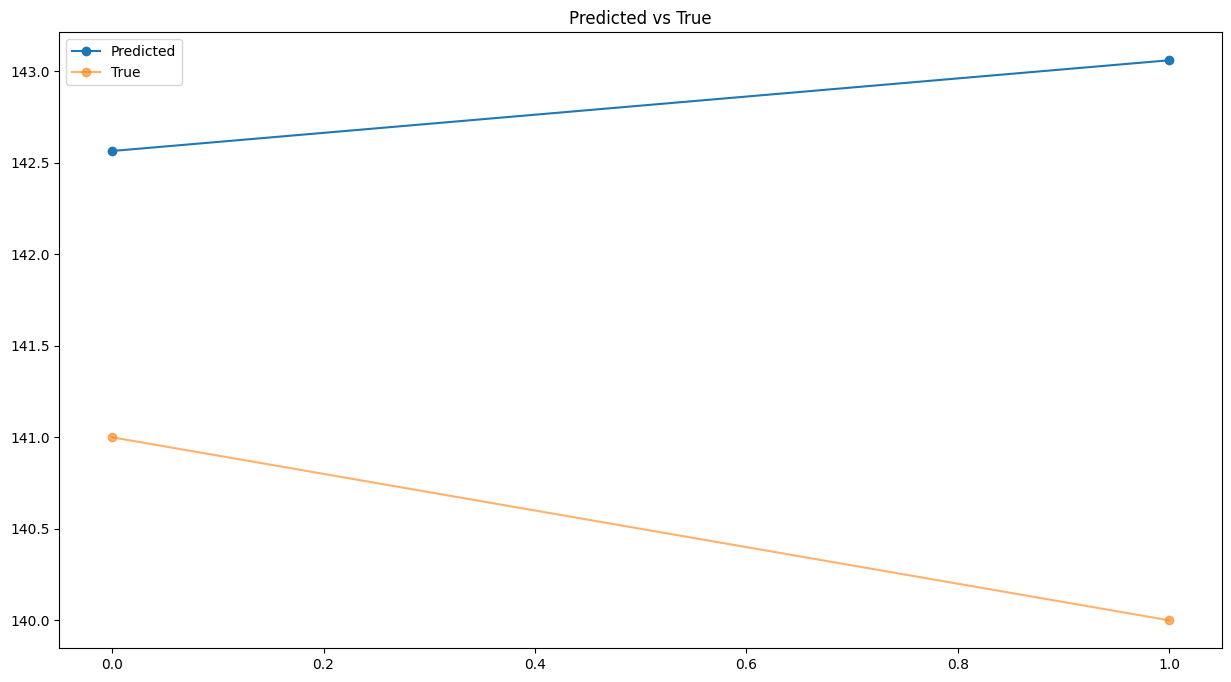

{'mae': 2.31231689453125, 'mse': 2.430253579718787, 'rmse': 5.906132461735979}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 11ms/step


Glucose level Predict  Glucose level True
0               0.225115            0.182609
1               0.141325            0.154348
2               0.154360            0.152174
3               0.151973            0.150000
4               0.147222            0.123913

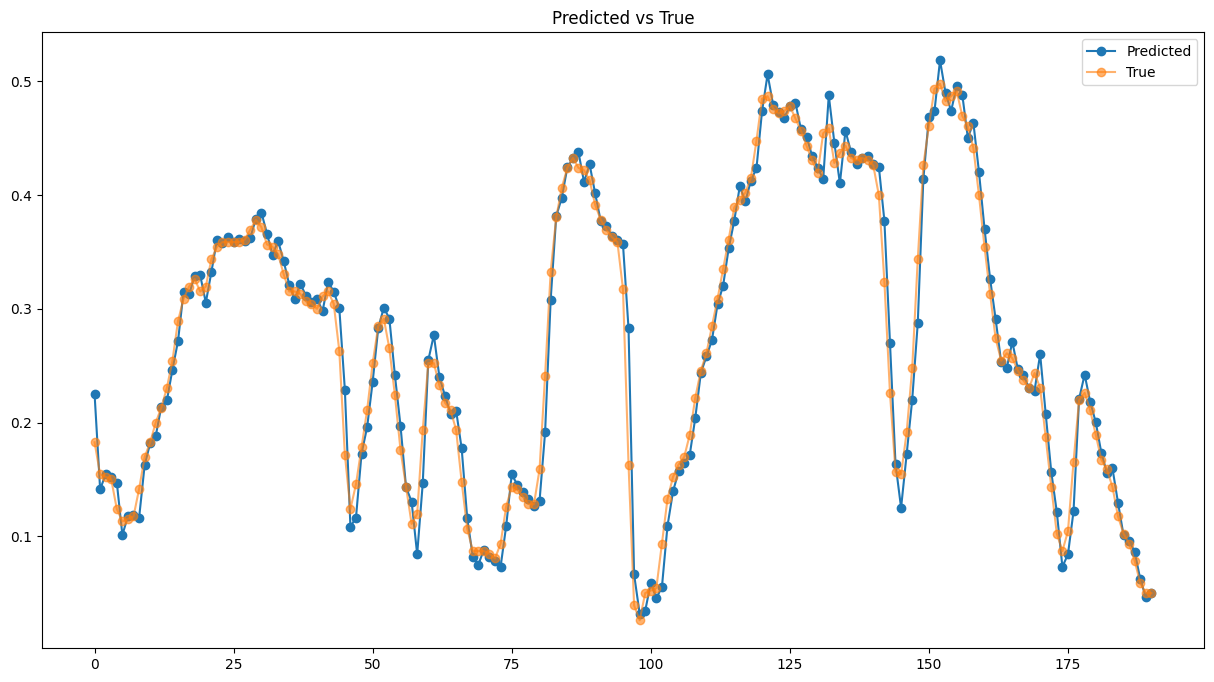

{'mae': 0.013194804585369415,
 'mse': 0.019276932376155364,
 'rmse': 0.00037160012183486694}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

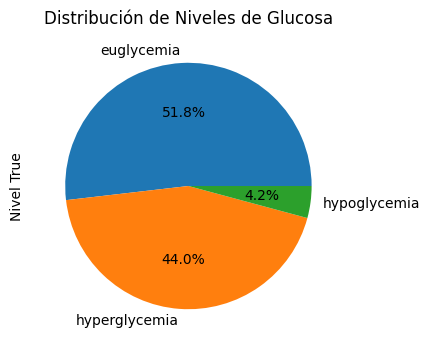

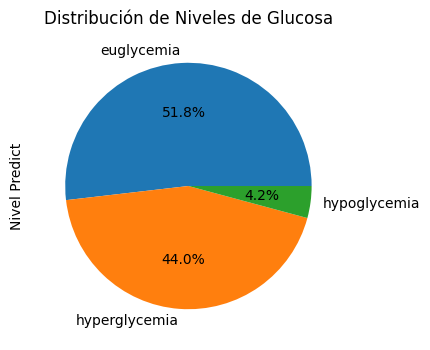

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             143.552994    euglycemia
1               111.0  euglycemia             105.009521    euglycemia
2               110.0  euglycemia             111.005508    euglycemia
3               109.0  euglycemia             109.907516    euglycemia
4                97.0  euglycemia             107.721977    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


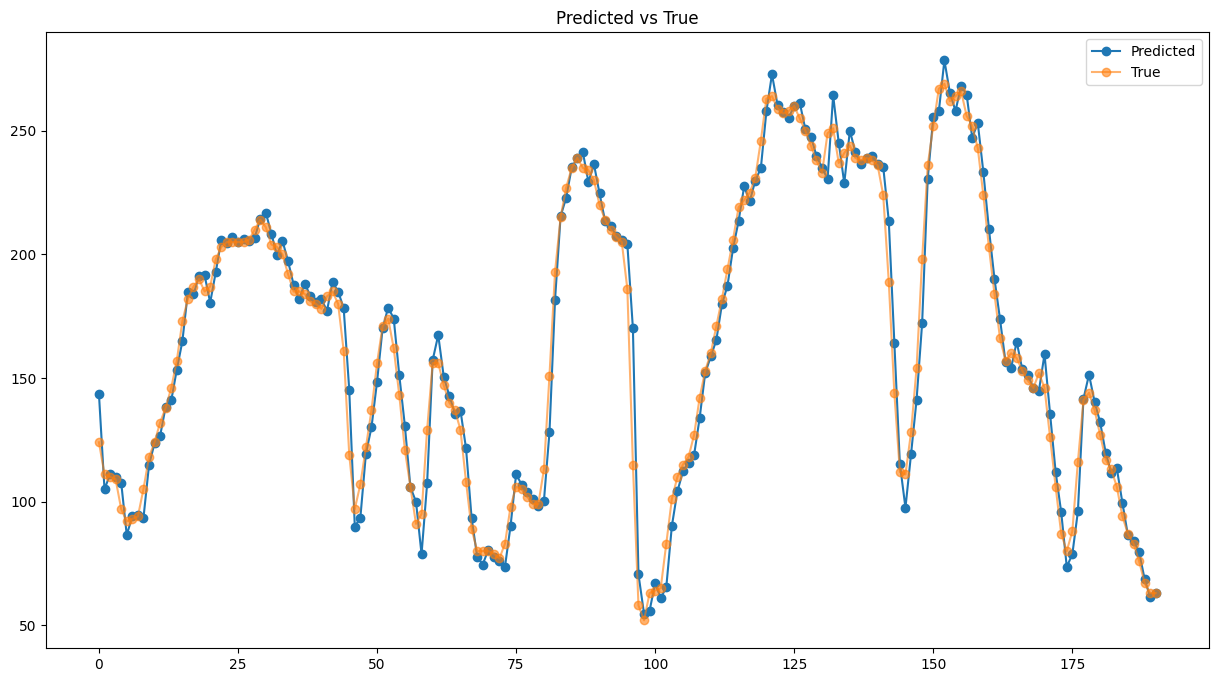

{'mae': 6.069609736896934, 'mse': 8.867388843483445, 'rmse': 78.63058490153466}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  143.552994
2023-01-01 00:15:00   111.0  105.009521
2023-01-01 00:30:00   110.0  111.005508
2023-01-01 00:45:00   109.0  109.907516
2023-01-01 01:00:00    97.0  107.721977
...                     ...         ...
2023-01-02 22:30:00    83.0   84.233635
2023-01-02 22:45:00    76.0   79.686676
2023-01-02 23:00:00    67.0   68.671463
2023-01-02 23:15:00    63.0   61.353508
2023-01-02 23:30:00    63.0   62.871071

[191 rows x 2 columns]

AP, BE, EP: (0.9947368421052631, 0.005263157894736842, 0.0)


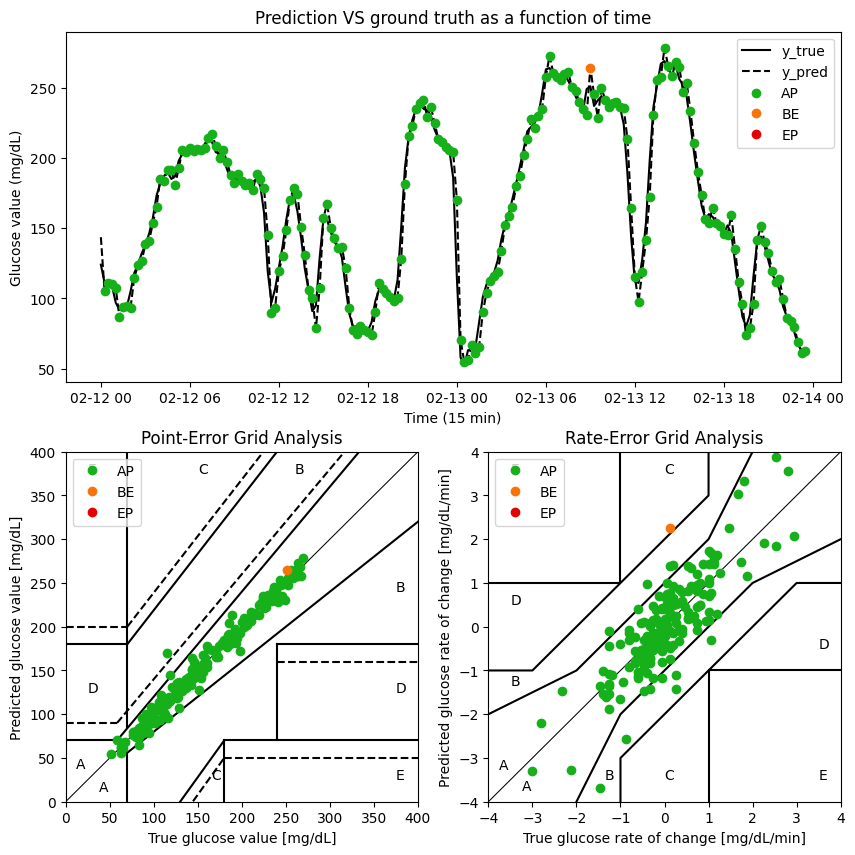

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.371806            0.373913
1               0.388098            0.400000
2               0.419676            0.404348
3               0.400927            0.406522
4               0.413739            0.397826

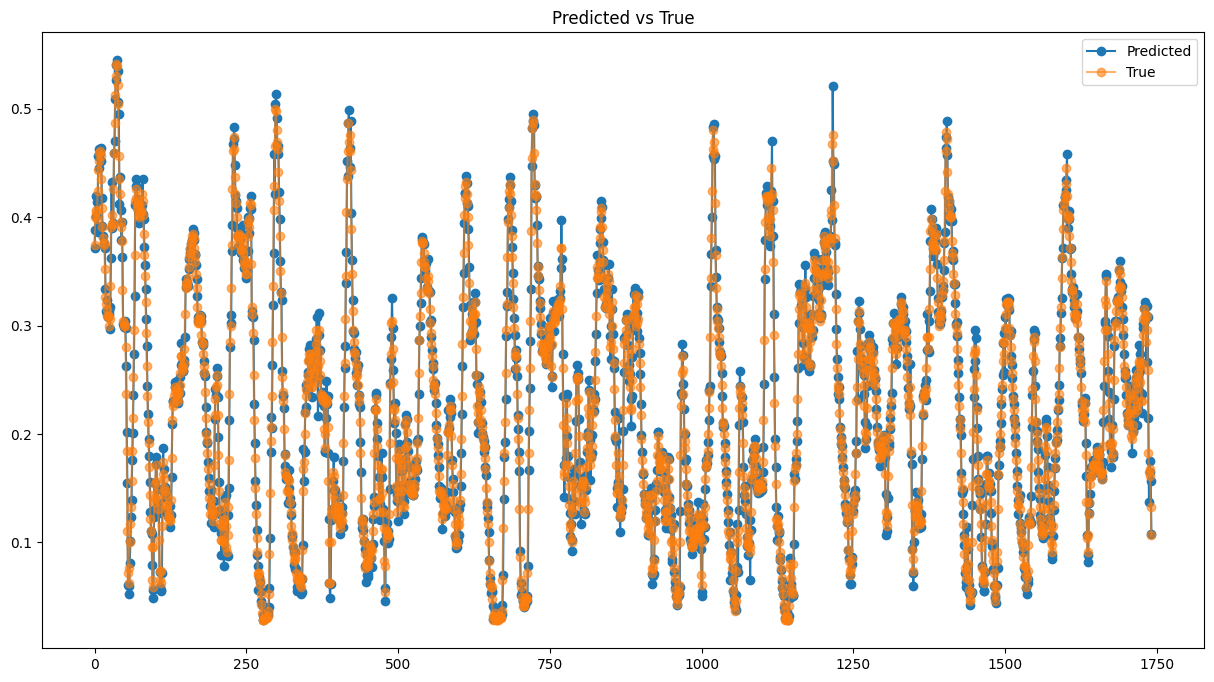

{'mae': 0.009115083581039811,
 'mse': 0.012826916295267018,
 'rmse': 0.00016452978164578657}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

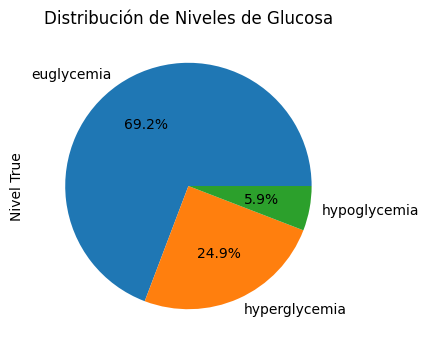

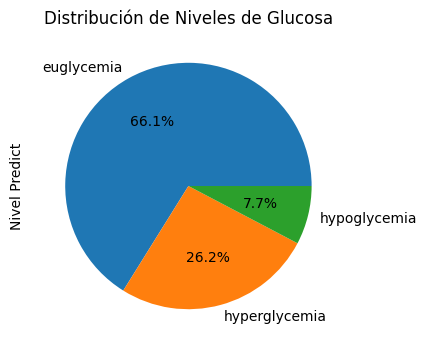

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             211.030640  hyperglycemia
1               224.0  hyperglycemia             218.524918  hyperglycemia
2               226.0  hyperglycemia             233.051147  hyperglycemia
3               227.0  hyperglycemia             224.426285  hyperglycemia
4               223.0  hyperglycemia             230.319946  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


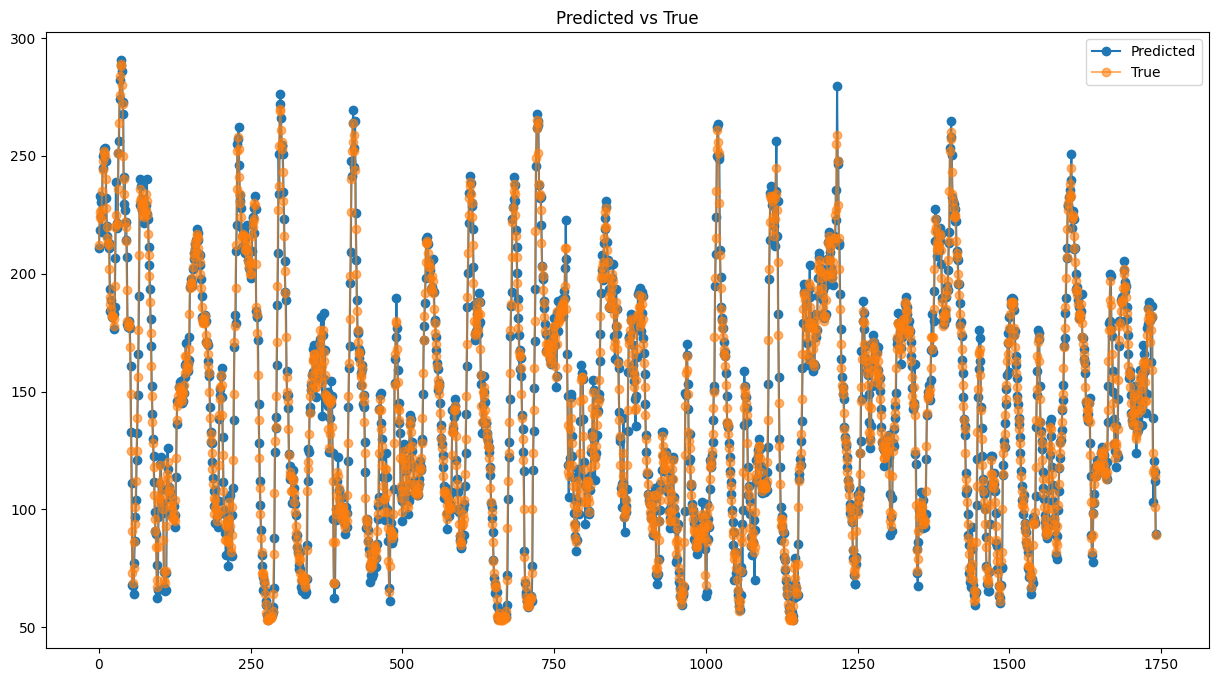

{'mae': 4.192938552138179, 'mse': 5.90038148142332, 'rmse': 34.814501626323256}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  211.030640
2023-01-01 00:15:00   224.0  218.524918
2023-01-01 00:30:00   226.0  233.051147
2023-01-01 00:45:00   227.0  224.426285
2023-01-01 01:00:00   223.0  230.319946
...                     ...         ...
2023-01-19 02:15:00   116.0  102.970909
2023-01-19 02:30:00   117.0  120.568626
2023-01-19 02:45:00   114.0  115.819008
2023-01-19 03:00:00   101.0  112.259102
2023-01-19 03:15:00    89.0   89.624313

[1742 rows x 2 columns]

AP, BE, EP: (0.9931074095347502, 0.006318207926479035, 0.0005743825387708214)


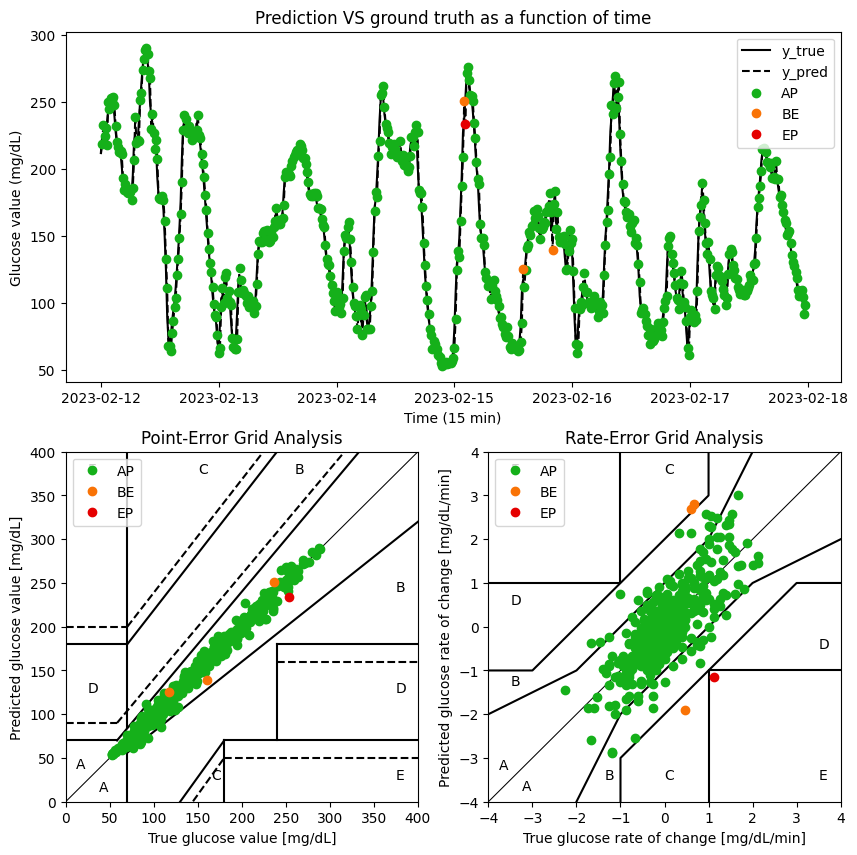

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 9ms/step


Glucose level Predict  Glucose level True
0               0.275259            0.261858
1               0.242047            0.229051
2               0.205487            0.196245
3               0.175892            0.163439
4               0.144620            0.130632

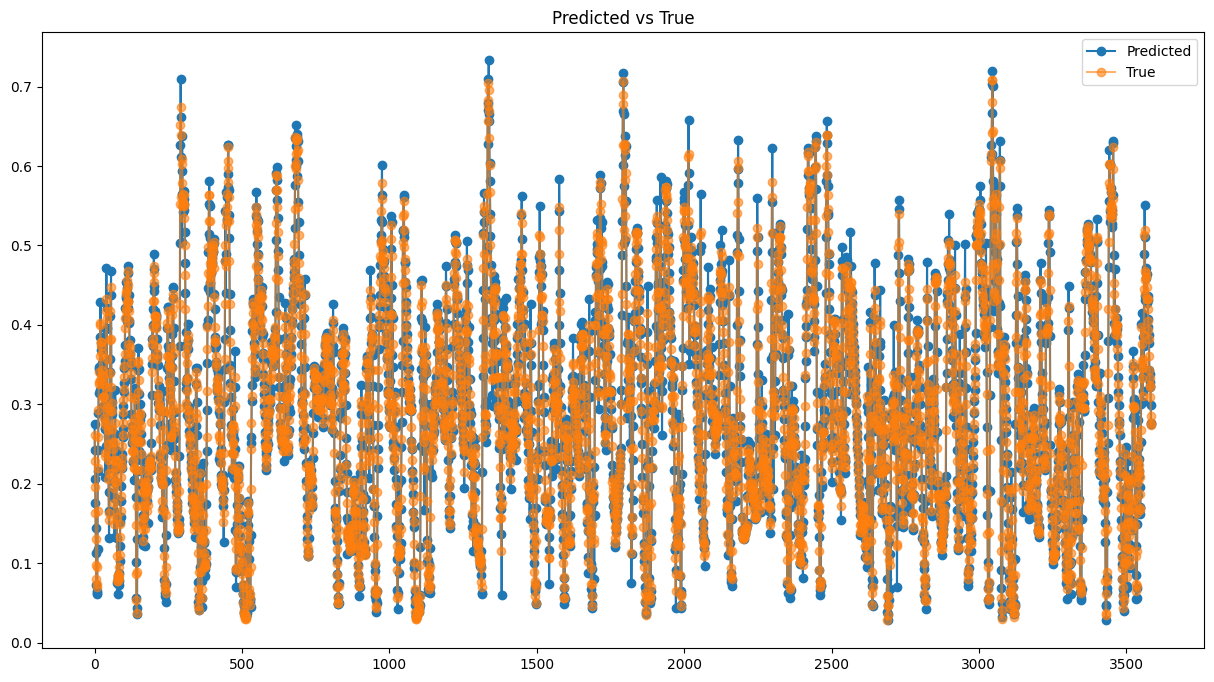

{'mae': 0.014503082442286078,
 'mse': 0.020972604317471107,
 'rmse': 0.00043985013185720775}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

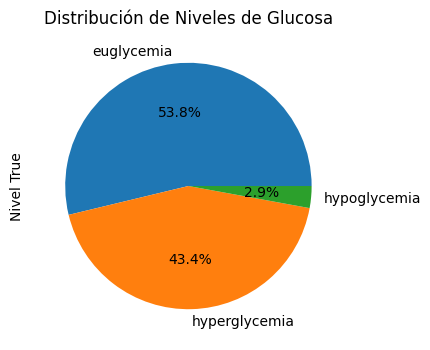

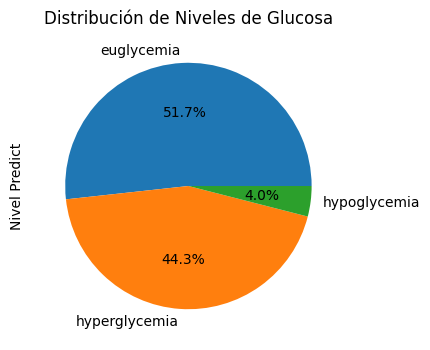

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             166.619156    euglycemia
1          145.363636  euglycemia             151.341431    euglycemia
2          130.272727  euglycemia             134.524078    euglycemia
3          115.181818  euglycemia             120.910484    euglycemia
4          100.090909  euglycemia             106.525055    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


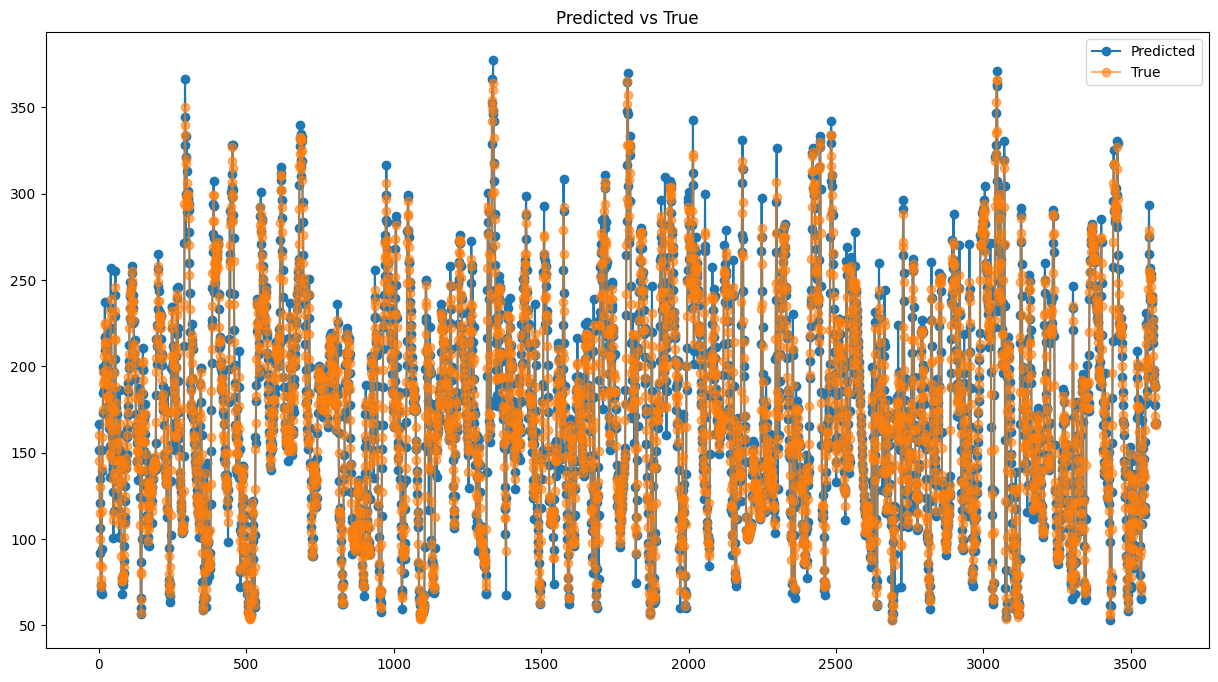

{'mae': 6.67141777550376, 'mse': 9.647397657017674, 'rmse': 93.07228155263012}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  166.619156
2023-01-01 00:15:00  145.363636  151.341431
2023-01-01 00:30:00  130.272727  134.524078
2023-01-01 00:45:00  115.181818  120.910484
2023-01-01 01:00:00  100.090909  106.525055
...                         ...         ...
2023-02-07 07:15:00  188.000000  188.089172
2023-02-07 07:30:00  182.000000  188.666214
2023-02-07 07:45:00  171.000000  177.803894
2023-02-07 08:00:00  167.000000  166.684189
2023-02-07 08:15:00  166.000000  167.477859

[3586 rows x 2 columns]

AP, BE, EP: (0.9707112970711297, 0.02594142259414226, 0.0033472803347280333)


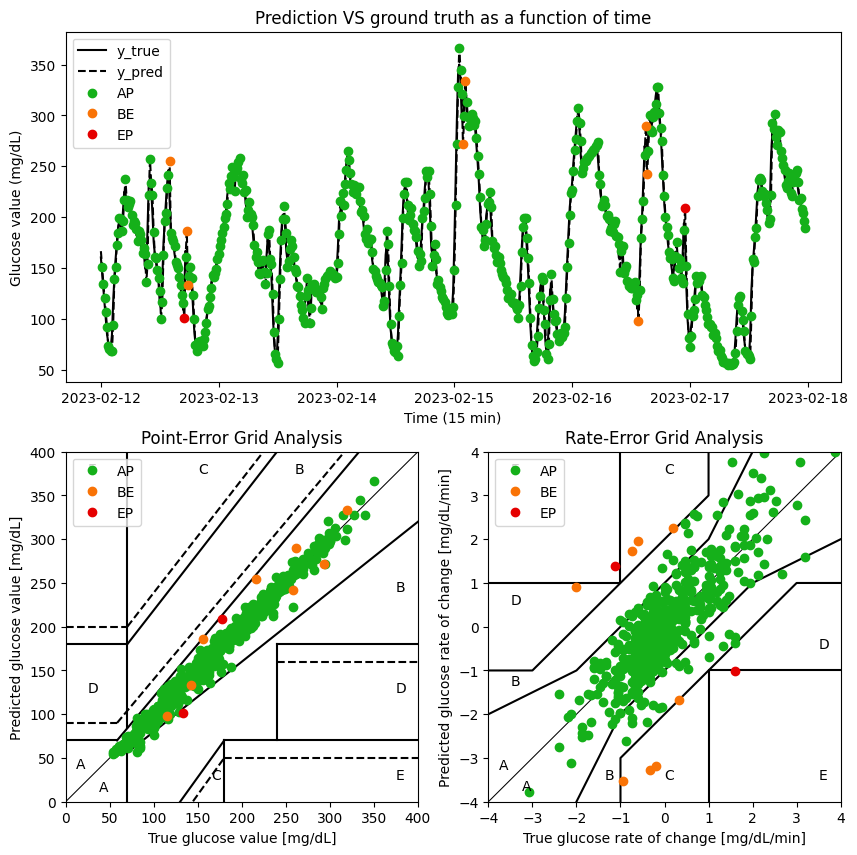

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 8ms/step


Glucose level Predict  Glucose level True
0               0.541130            0.534783
1               0.530375            0.500000
2               0.470085            0.484783
3               0.487098            0.463043
4               0.438398            0.428261

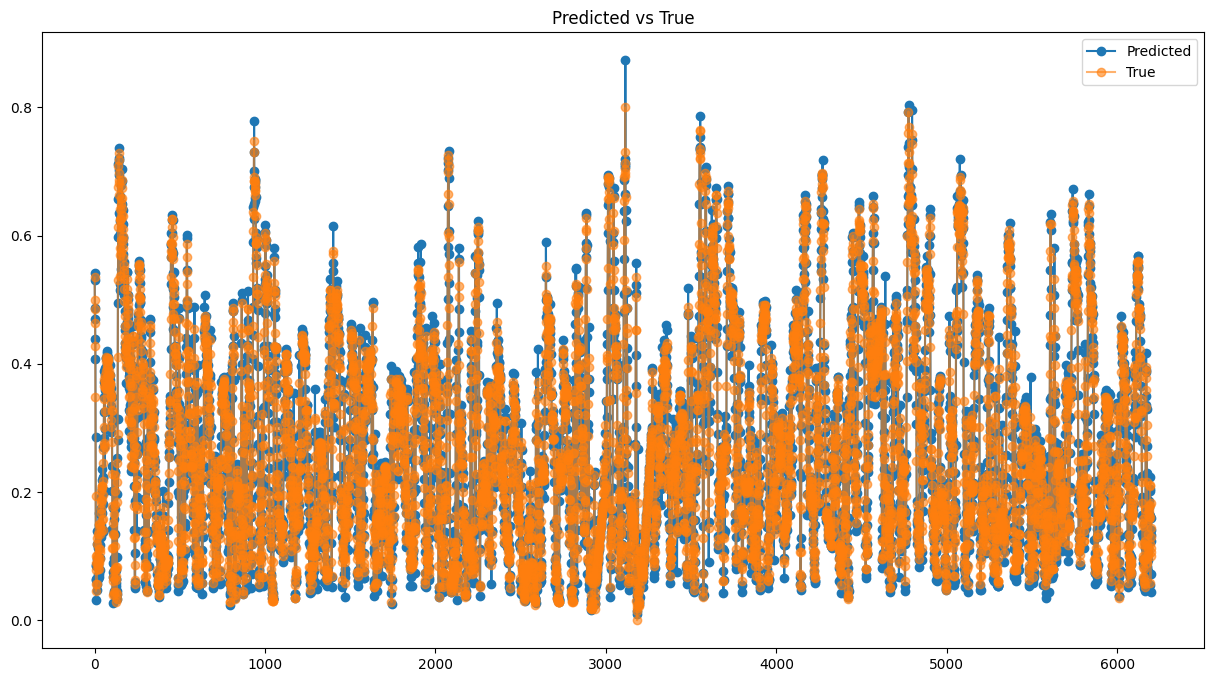

{'mae': 0.01666209994860124,
 'mse': 0.024394542915139674,
 'rmse': 0.0005950937240385913}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

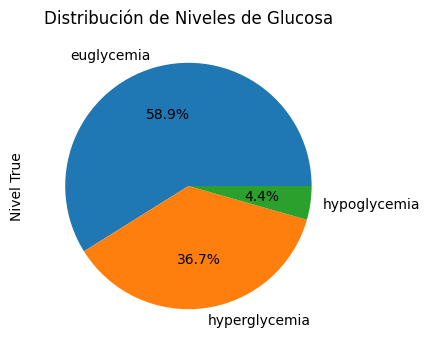

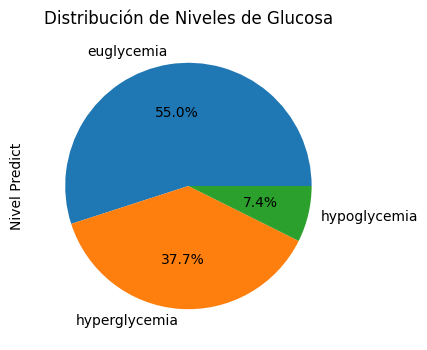

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             288.919983  hyperglycemia
1               270.0  hyperglycemia             283.972534  hyperglycemia
2               263.0  hyperglycemia             256.238892  hyperglycemia
3               253.0  hyperglycemia             264.065186  hyperglycemia
4               237.0  hyperglycemia             241.663132  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


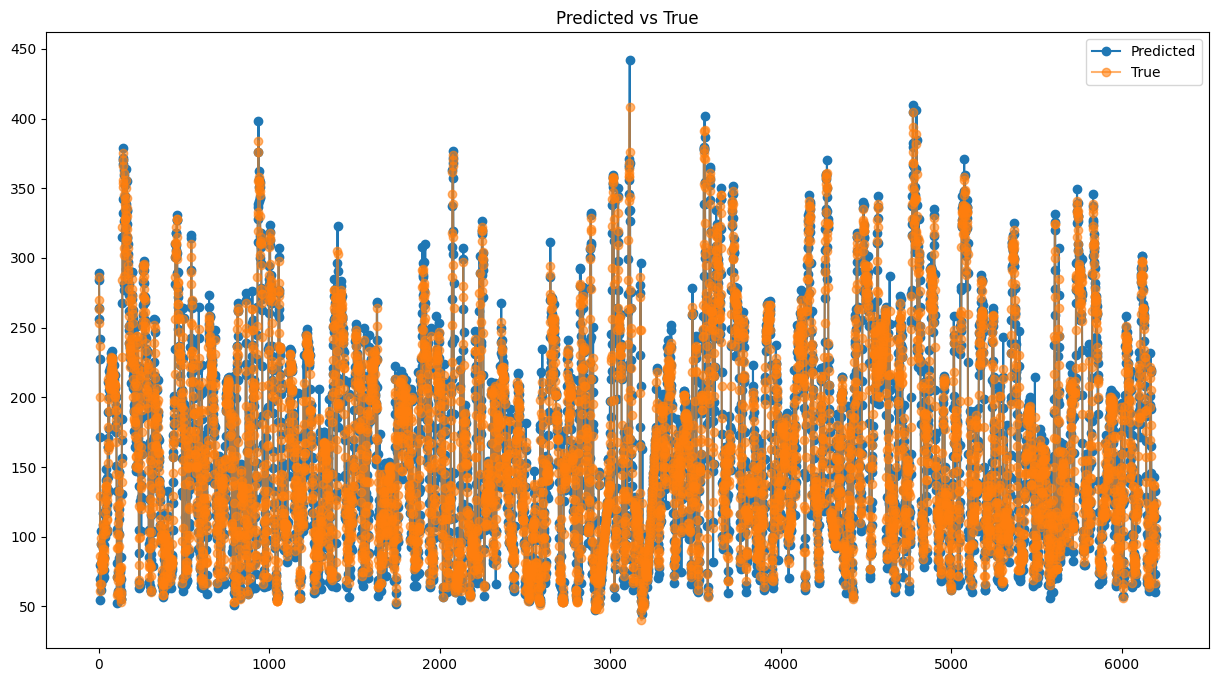

{'mae': 7.664566132484142,
 'mse': 11.221489891562477,
 'rmse': 125.92183538643887}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  288.919983
2023-01-01 00:15:00   270.0  283.972534
2023-01-01 00:30:00   263.0  256.238892
2023-01-01 00:45:00   253.0  264.065186
2023-01-01 01:00:00   237.0  241.663132
...                     ...         ...
2023-03-06 13:00:00   100.0  104.424294
2023-03-06 13:15:00    89.0   96.560829
2023-03-06 13:30:00    92.0   73.069687
2023-03-06 13:45:00   106.0  101.112816
2023-03-06 14:00:00   124.0  113.529366

[6201 rows x 2 columns]

AP, BE, EP: (0.9624193548387097, 0.03225806451612903, 0.00532258064516129)


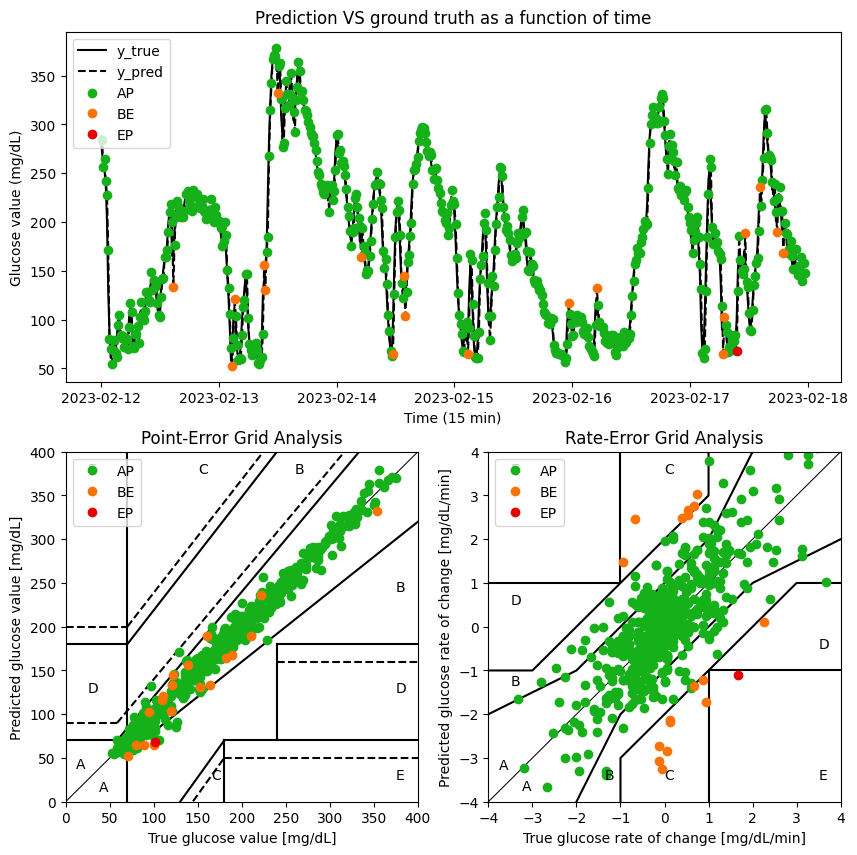

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)